# Expected Value


Sam Bankman-Fried is quoted in interviews as saying that he wants to be "risk neutral," or have a very low level of risk-aversion, therefore he only cares about maximizing the expected value of his investments. What exactly do those things mean? What is an expected value, and what toes it have to do with risk?


## What is expected value?


**Expected Value** is just a way of applying the concept of a weighted average to a random event. If you've ever had a class where your final grade was 40% homework and 60% tests, or anything like that, that's a weighted average.  When we're using a weighted average to make predictions, we highlight that by calling it an expected value.

It's important to remember that in practice, the expected value is just the average value that you'd expect to get if you were able to try something many, many times.

So, is there a way to calculate an expected value?  Sure.  Let's consider a few examples now.


## Expected value examples


### A standard six-sided die


#### Calculating expected value


If I wanted to work out the expected value of rolling a standard six-sided die (1D6), I just multiply each roll by how likely it is, and add them up.


$$
\frac{1}{6} \times 1 + \frac{1}{6} \times 2 + \frac{1}{6} \times 3 + \frac{1}{6} \times 4 + \frac{1}{6} \times 5 + \frac{1}{6} \times 6
$$

$$
\frac{1}{6} \times \left( 1+2+3+4+5+6 \right)
$$

$$
\frac{1}{6} \times 21
$$

$$
\frac{7}{2}
$$

$$
3.5
$$


#### Verifying expected value


Can I verify that the average value of the die is what I calculated?  With the help of my robot friends it's no trouble at all to roll even a million six-sided dice and find the average. Let's do that.

The block of code below this one imports some libraries used to do math with Python called numpy and pandas, and then a graphing library called matplotlib.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This next block of code sets up a numpy tool for working with random numbers. This is what will roll the dice for us.


In [127]:
from numpy.random import default_rng
rng = default_rng(seed=1676329117)
viewer_rng = default_rng()

There are two random number generators above.  One of them has a fixed seed.  There's nothing special about the number, it's just a timestamp from my computer's clock while I was working on this.  I will use this one in my examples, because it means that I can know the results will be the same each time, and that you're seeing as you read this what I see as I write this.  The second random number generator will give different results every time, and I'll use that when I invite you to try things yourself.

This code sets a variable for how many times we want to roll the die.


In [128]:
roll_count = 1_000_000

The cell below sets the number of sides that the die should have. That means it's easy to try this with all the polyhedral dice used in tabletop roleplaying games like Dungeons & Dragons or Pathfinder. We could also simulate dice with a number of sides that would be difficult to manufacture.


In [129]:
die_size = 6

The following cell actually rolls the virtual dice for us. More specifically, it creates a pandas array containing the results of the rolls. It displays a sample from the beginning and end of the list.


In [130]:
die_roll_df = pd.DataFrame(rng.integers(1, die_size, size=roll_count, endpoint=True), index=np.arange(1, roll_count+1), columns=["value"])
die_roll_df.index.name="roll"

display(die_roll_df)

,value
roll,
1,6
2,5
3,2
4,1
5,1
...,...
999996,5
999997,4
999998,2


The list of rolls is too long to view manually, and it'd be hard to tell just by looking if the virtual die was really fair. Let's prepare some summary statistics to double check. The following block of code makes a table that shows how often each value was rolled, and what proportion of the total rolls were that value.


In [131]:

die_roll_counts_se = die_roll_df["value"].value_counts(sort=False, normalize=False).sort_index()
die_roll_counts_se.name="count"
die_roll_props_se = die_roll_df["value"].value_counts(sort=False, normalize=True).sort_index()
die_roll_props_se.name="proportion"
die_roll_stats_df = pd.concat([die_roll_counts_se, die_roll_props_se], axis="columns")
display(die_roll_stats_df)

,count,proportion
1,166656,0.166656
2,166474,0.166474
3,167254,0.167254
4,166712,0.166712
5,166439,0.166439
6,166465,0.166465


Each roll should be just about equally common, but we can turn the table into something that is easier to inspect visually. The code blow will produce a bar chart.


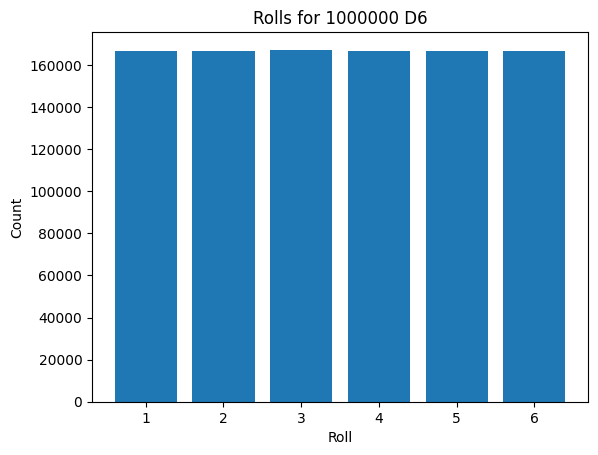

In [132]:

fig, ax = plt.subplots()
ax.bar(die_roll_stats_df.index.astype(str), die_roll_stats_df.loc[:, "count"])
ax.set_xlabel("Roll")
ax.set_ylabel("Count")
ax.set_title(f"Rolls for {roll_count:n} D{die_size:n}")
plt.show()

Now that we are hopefully convinced that each side of the virtual die was just about equally likely, we can finally calculate the expected value (EV) of rolling it.


In [133]:
die_roll_mean = die_roll_df['value'].mean()
display(f"The average of {roll_count:n} rolls of a d{die_size:n} is {die_roll_mean:g}")

'The average of 1000000 rolls of a d6 is 3.4992'

But a fair die isn't a very difficult test. Does the expected value also show itself for more complicated distributions? What about an unfair die?

### A non-standard 6 sided die


A standard die is a pretty easy case. Each value is equally likely so it's not even really necessary to do the math the long way. Does this apporach work even for non-standard dice? Let's try it.

Imagine I took at six sided die and re-labeled the faces. I'll put a 1 on the first three faces, a 2 on the faces that originally said 4 and 5, and a 3 on the face that said 6. How do I calculate the expected value of this new, weighted die, and do observations agree with calculations?


#### Calculating expected value


$$
\frac{3}{6} \times 1 + \frac{2}{6} \times 2 + \frac{1}{6} \times 3
$$

$$
\frac{3}{6} + \frac{4}{6} + \frac{3}{6}
$$

$$
\frac{{10}}{6}
$$

$$
\frac{5}{3}
$$

$$
1.\overline 6
$$


#### Verifying expected value


Below, I create an array showing the faces of our weighted die.


In [134]:
die_faces = np.array([1,1,1,2,2,3])

Since I want to roll using our weighted die, I need to use a different function to make the random number generator pick from my array of faces, but this code is otherwise very similar to what I used in the previous example.


In [135]:
weighted_rolls_df =pd.DataFrame(rng.choice(die_faces, size=roll_count), index=np.arange(1, roll_count+1), columns=["result"])
weighted_rolls_df.columns.name="roll numer"
weighted_rolls_df

roll numer,result
1,1
2,1
3,2
4,2
5,2
...,...
999996,3
999997,2
999998,2
999999,1


The cell below produces a summary table like the one in the previous example. Based on what I worked out by hand above, I should expect to see rolls of 1 about half the time, rolls of 2 about 1/3 of the time and rolls of 3 about 1/6 of the time.


In [136]:
weighted_roll_counts_df = weighted_rolls_df["result"].value_counts(sort=False).sort_index()
weighted_roll_counts_df.name="count"
weighted_roll_proportions_se = weighted_rolls_df["result"].value_counts(sort="false", normalize=True)
weighted_roll_proportions_se.name="proportion"
weighted_roll_stats_df = pd.concat([weighted_roll_counts_df, weighted_roll_proportions_se], axis="columns")
display(weighted_roll_stats_df)

,count,proportion
1,500538,0.500538
2,332949,0.332949
3,166513,0.166513


The cell below turns the table above into a graph.


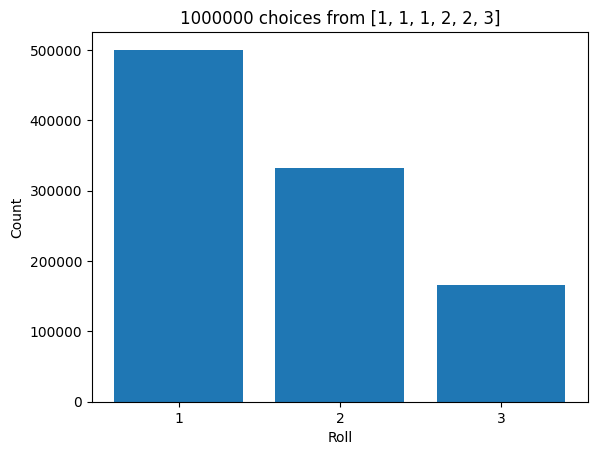

In [137]:
fig, ax = plt.subplots()
ax.bar(weighted_roll_counts_df.index.astype(str), weighted_roll_counts_df.array)
ax.set_xlabel("Roll")
ax.set_ylabel("Count")
ax.set_title(f"{roll_count:n} choices from {die_faces.tolist()}")
plt.show()

Now that the summary statistics have helped us convince ourselves that the computer is really rolling our weighted die, we can once again calculate the expected value.


In [138]:
weighted_roll_mean = weighted_rolls_df['result'].mean()
display(f"The average of {roll_count:n} choices from {die_faces.tolist()} is {weighted_roll_mean:g}")

'The average of 1000000 choices from [1, 1, 1, 2, 2, 3] is 1.66597'

## What does this have to do with finance?


Investments are uncertain. Sometimes you make money and sometimes you lose it. An investor might like to know how likely each outcome is and how much money they can expect to make - or lose - on average. The long-term average is basically the definition of the expected value.

Investments share their win-some, lose-some random outcome fundamentals with gambling games. Some people would even tell you that the difference between investing and gambling is that when you gamble, you know the expected value is negative. That is, when you gamble you are accepting that you'll lose money on average. So, let's demonstrate applying expected value to a simple dice game.


## A fair dice game


My robot friend and I are going to play a simple game. They roll a standard six-sided die and they win a number of dollars equal to the value that they roll. How much should they be willing to pay to play this game with me? Given the price, how much money should they expect to make or lose per round on average?

We already calculated the expected value of a standard six-sided die above. We know it's 3.5. So the least they could win is $1, the most is $6 and the average will be $3.50. What happens if I set the price at exactly $3.50?


In [139]:
die_size = 6
roll_count = 100_000
game_price = 3.5

In [140]:
die_roll_df = pd.DataFrame(rng.integers(1, die_size, size=roll_count, endpoint=True), index=np.arange(1, roll_count+1), columns=["roll"])
die_roll_df = die_roll_df.rename_axis("round", axis="columns")
die_roll_df["winnings"] = die_roll_df["roll"] - game_price
display(die_roll_df)
f"The average value for each roll is {die_roll_df['winnings'].mean()}"

round,roll,winnings
1,3,-0.5
2,4,0.5
3,3,-0.5
4,3,-0.5
5,4,0.5
...,...,...
99996,2,-1.5
99997,2,-1.5
99998,5,1.5
99999,1,-2.5


'The average value for each roll is -0.0024'

The average winnings/losses for each roll varies, but it tends to be pretty close to zero.

### Fallacy Warning!


Just because the average winnings/losses for a game is close to zero doesn't mean that a player's total winning and losses will stay near zero if they play over and over. Let's add some columns to the game data we generated above and see how unbalanced the outcomes of this very fair game can still be.


round,roll,winnings,total,wost,best
1,3,-0.5,-0.5,-0.5,-0.5
2,4,0.5,0.0,-0.5,0.0
3,3,-0.5,-0.5,-0.5,0.0
4,3,-0.5,-1.0,-1.0,0.0
5,4,0.5,-0.5,-1.0,0.0
...,...,...,...,...,...
99996,2,-1.5,-237.0,-348.0,243.5
99997,2,-1.5,-238.5,-348.0,243.5
99998,5,1.5,-237.0,-348.0,243.5
99999,1,-2.5,-239.5,-348.0,243.5


<AxesSubplot: >

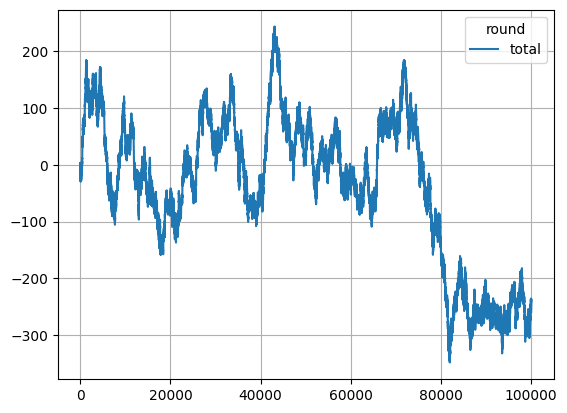

In [141]:
die_roll_df["total"] = die_roll_df["winnings"].cumsum()
die_roll_df["wost"] = die_roll_df["total"].cummin()
die_roll_df["best"] = die_roll_df["total"].cummax()
display(die_roll_df)
display(die_roll_df.loc[:, ["total"]].plot(grid=True))


### Gambling

If the dice game we described above was being offered by a casino then they'd never charge just $3.50 to play. As the graph above shows, they could still lose large amounts of money just by offering fair odds, and casinos aren't here to lose money. How does the game change as we vary the price? 


Since I want to try a variety of prices, I'm going to make a function so I don't have to repeat the code for each price.

In [142]:
def play_game(game_price, roll_count = 100_000, die_type=6):
    if isinstance(die_type, int):
        die_roll_df = pd.DataFrame(rng.integers(1, die_type, size=roll_count, endpoint=True), index=np.arange(1, roll_count+1), columns=["roll"])
    else:
        die_roll_df = pd.DataFrame(rng.choice(die_type, size=roll_count), index=np.arange(1, roll_count+1), columns=["roll"])
    die_roll_df = die_roll_df.rename_axis("round", axis="columns")
    die_roll_df["winnings"] = die_roll_df["roll"] - game_price
    die_roll_df["total"] = die_roll_df["winnings"].cumsum()
    die_roll_df["wost"] = die_roll_df["total"].cummin()
    die_roll_df["best"] = die_roll_df["total"].cummax()
    return die_roll_df


Next I'll make a chart showing the game at various prices.  I'm only going to increase the price by one penny ($0.01) each time.  Let's see what happens.

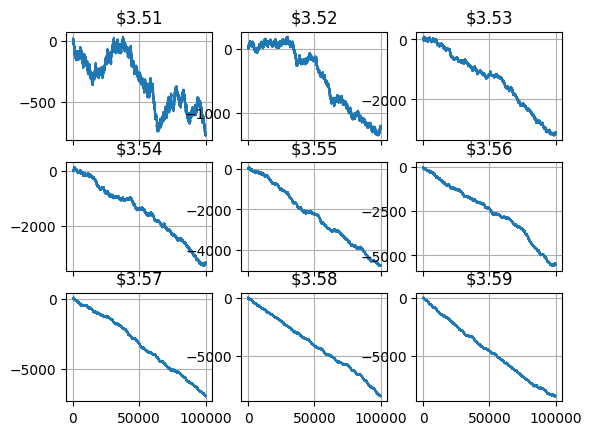

In [143]:
fig, axs = plt.subplots(3, 3, sharex=True, )
fair_price = 3.50
for pos, ax in enumerate(axs.flat):
    version_price = fair_price + 0.01 + (0.01 * pos)
    game_results = play_game(version_price)
    ax.plot(game_results["total"])
    ax.grid(True)
    ax.set_title(f"${version_price:.2f}")


Just for symmetry's sake, and because the idea of investments is to make money, let's see what happens if I instead decrease the price of the game.

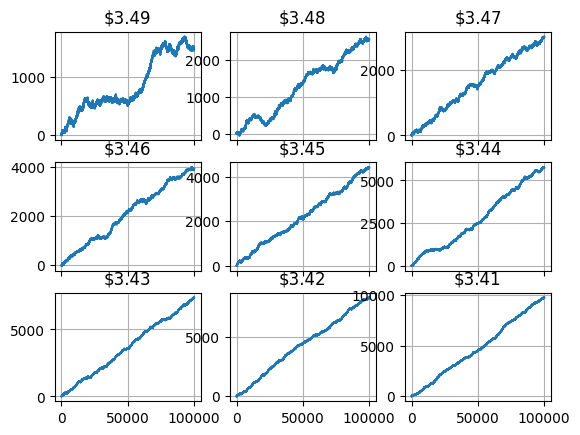

In [144]:
fig, axs = plt.subplots(3, 3, sharex=True, )
fair_price = 3.50
for pos, ax in enumerate(axs.flat):
    version_price = fair_price - 0.01 - (0.01 * pos)
    game_results = play_game(version_price)
    ax.plot(game_results["total"])
    ax.grid(True)
    ax.set_title(f"${version_price:.2f}")

As you can see, while a fair game can wander unpredictable between surprisingly large winnings and losses, even small changes in the expected value start to make the long-term wins or losses pretty predictable.  Those graphs start to look like straight lines fast.

Do these graphs look similar if we use our non-standard die?

## Non-standard die

'The average value for each roll is 0.0007933333333332161'

<AxesSubplot: >

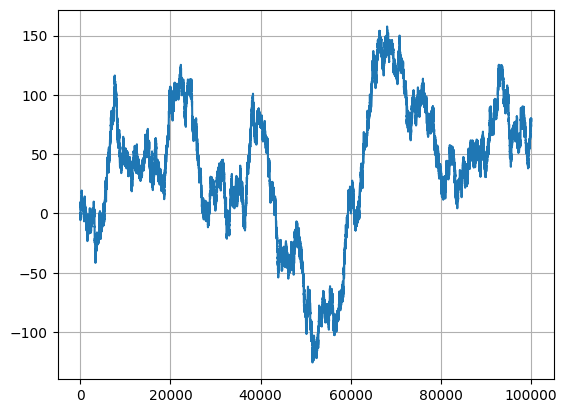

In [146]:
unbalanced_die_rolls = play_game(game_price=(5/3), die_type=die_faces)
unbalanced_average = unbalanced_die_rolls["winnings"].mean()
display(f"The average value for each roll is {unbalanced_average}")
unbalanced_die_rolls.loc[:, "total"].plot(grid=True, legend=False)